In [149]:
# Import necessary libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [1]:
# Main website URL
baseUrl = "https://500.co/startups?filter=1&region=US+-+Non+CA,LatAm,US+-+CA,Canada"

In [3]:
page = requests.get(baseUrl) # Loading the get response from baseURL
content = page.content # Unstructured html data

In [5]:
# print(content)

In [20]:
soup = BeautifulSoup(content,'html5lib') # Converting the unstructured content to structured data

In [43]:
# print(soup.prettify)

In [31]:
table = soup.findAll('tbody',id = 'portfolioContainer',text = True)

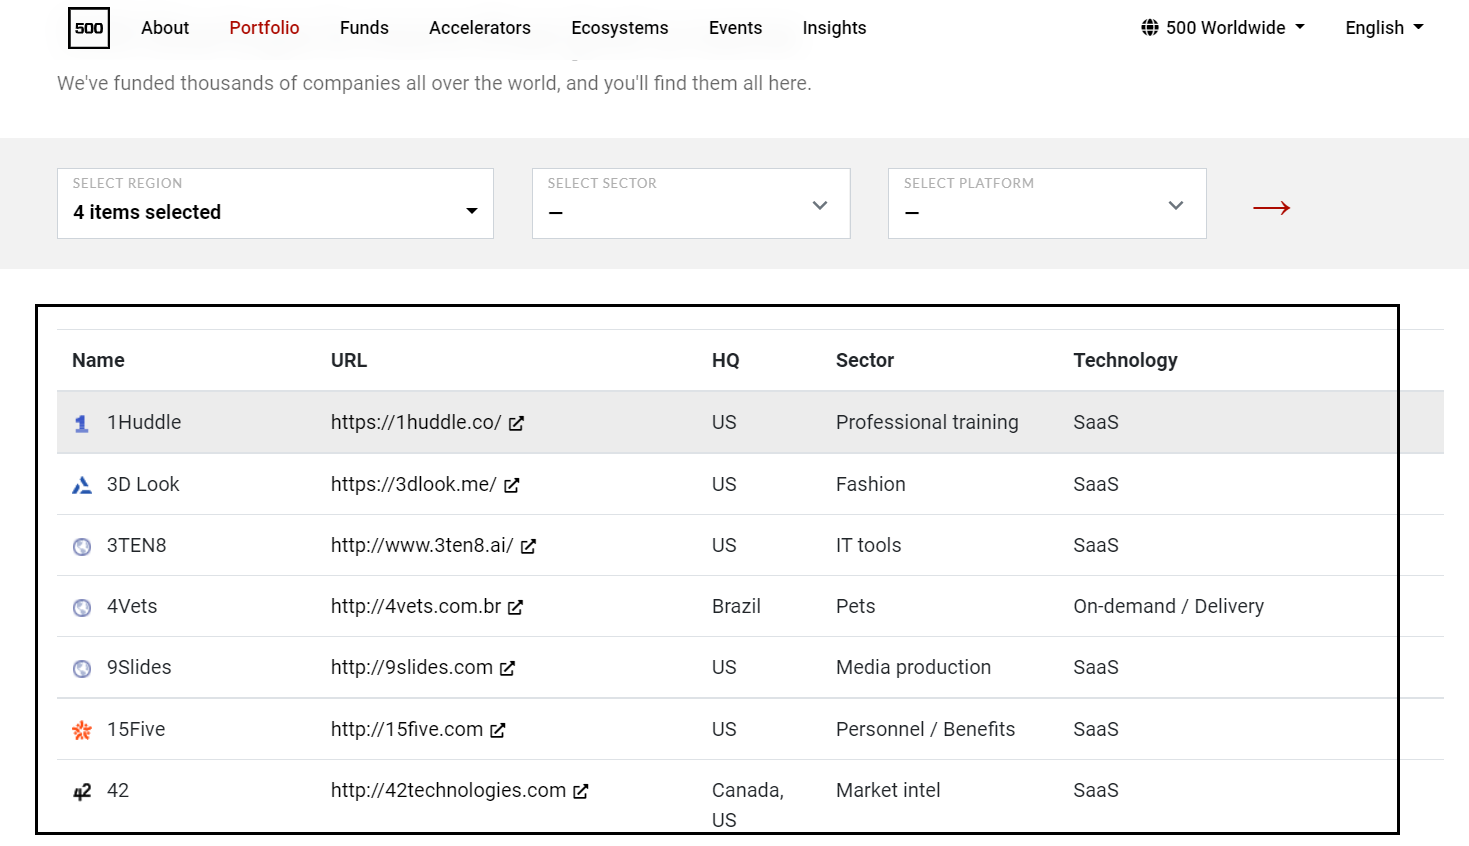

On visiting the website, you will find data is present in tablular kind 
of structure and each startup data is dynamically fetched from backend using javascript.


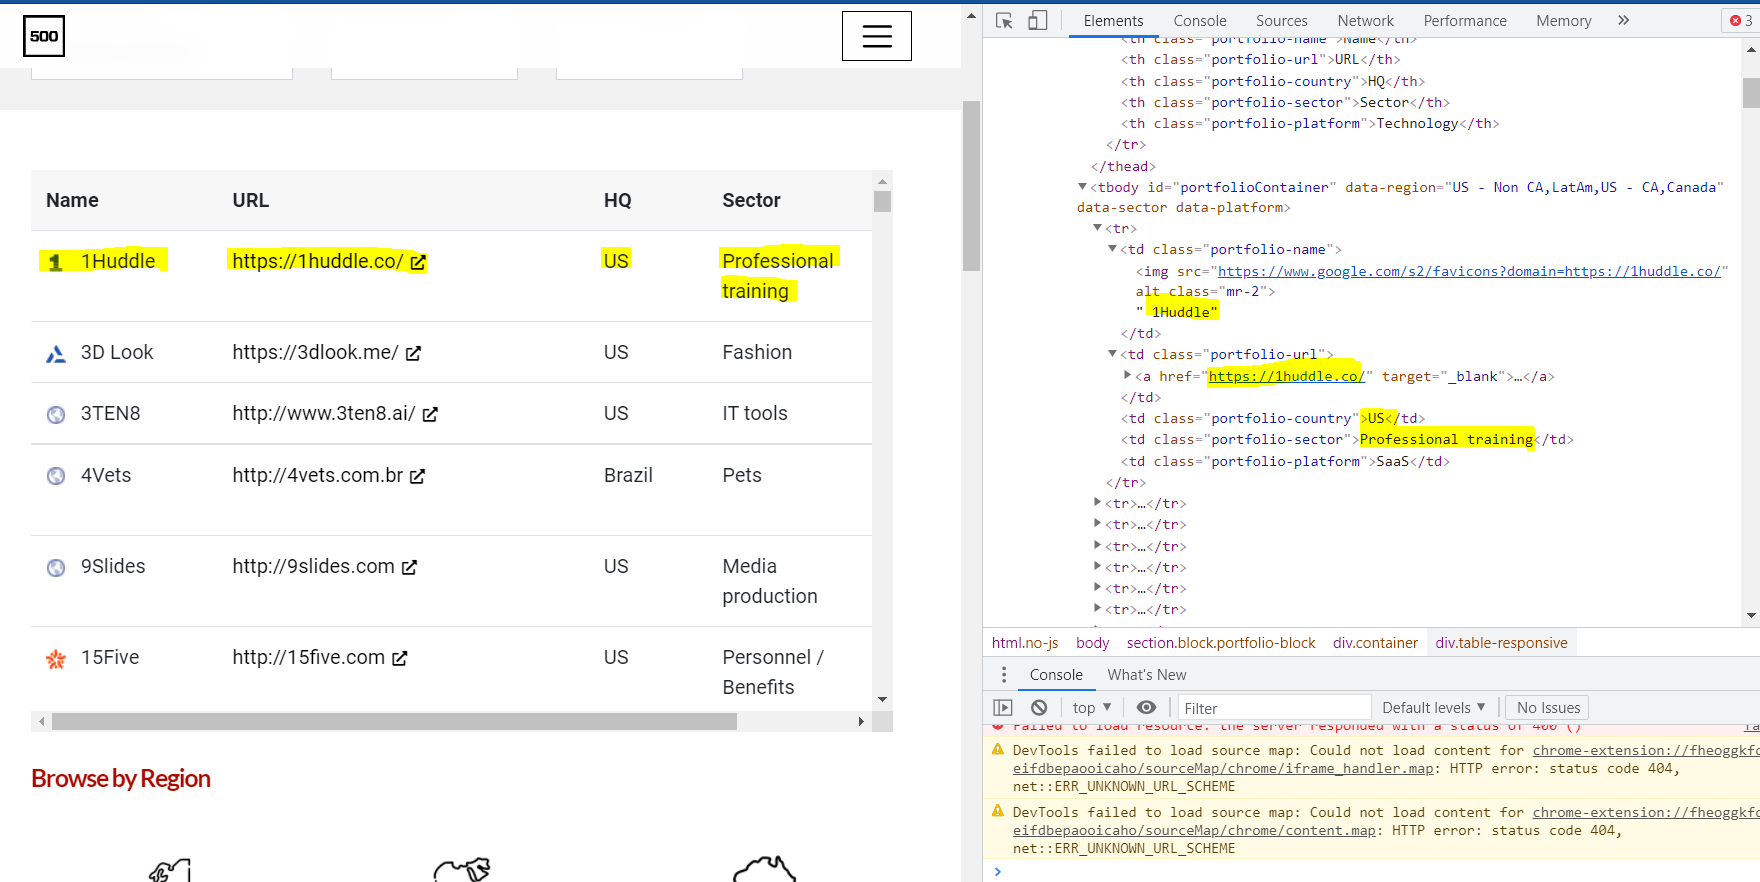

On further checking, data which i have to scrap is not getting fetched properly in notebook. Check below cell.

In [32]:
# Here <tr> tags are not getting fetched.
print(table)

[<tbody data-platform="" data-region="US - Non CA,LatAm,US - CA,Canada" data-sector="" id="portfolioContainer">

                    </tbody>]


After Searching on net, I found this [link](https://stackoverflow.com/questions/49260014/beautifulsoup-returns-empty-td-tags) which helped me how this kind of data can be fetched.

In [44]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36',
           'Accept': 'application/json, text/javascript, */*; q=0.01'}

In [137]:
# url = "https://500.co/!/airtable-integration/portfolio?region=US+-+Non+CA%2CLatAm%2CUS+-+CA%2CCanada&sector=&platform=&offset="
# # dataFile = open('/content/data.csv','w')
# jsonData = requests.get(url,headers = headers).json()
# dataframe = pd.DataFrame()
# for pos,data in enumerate(jsonData['data']):
#   id = data['id']
#   fields = data['fields']
#   createdTime = data['createdTime']
#   dataframe = dataframe.append(pd.DataFrame(fields,index = [0])).fillna("")
#   dataframe['OffsetId'] = id
#   dataframe['CreationTime'] = createdTime
# dataframe = dataframe.reset_index()
# dataframe = dataframe.drop(columns=['index'])



# # d = jsonData['data'][0]['fields']
# # dataframe = pd.DataFrame.from_records([d])
# # dataframe['offsetId'] = jsonData['data'][0]['id']
# # dataframe['creationTime'] = jsonData['data'][0]['createdTime']
# # for content in jsonData['data']:
# #   print(content)

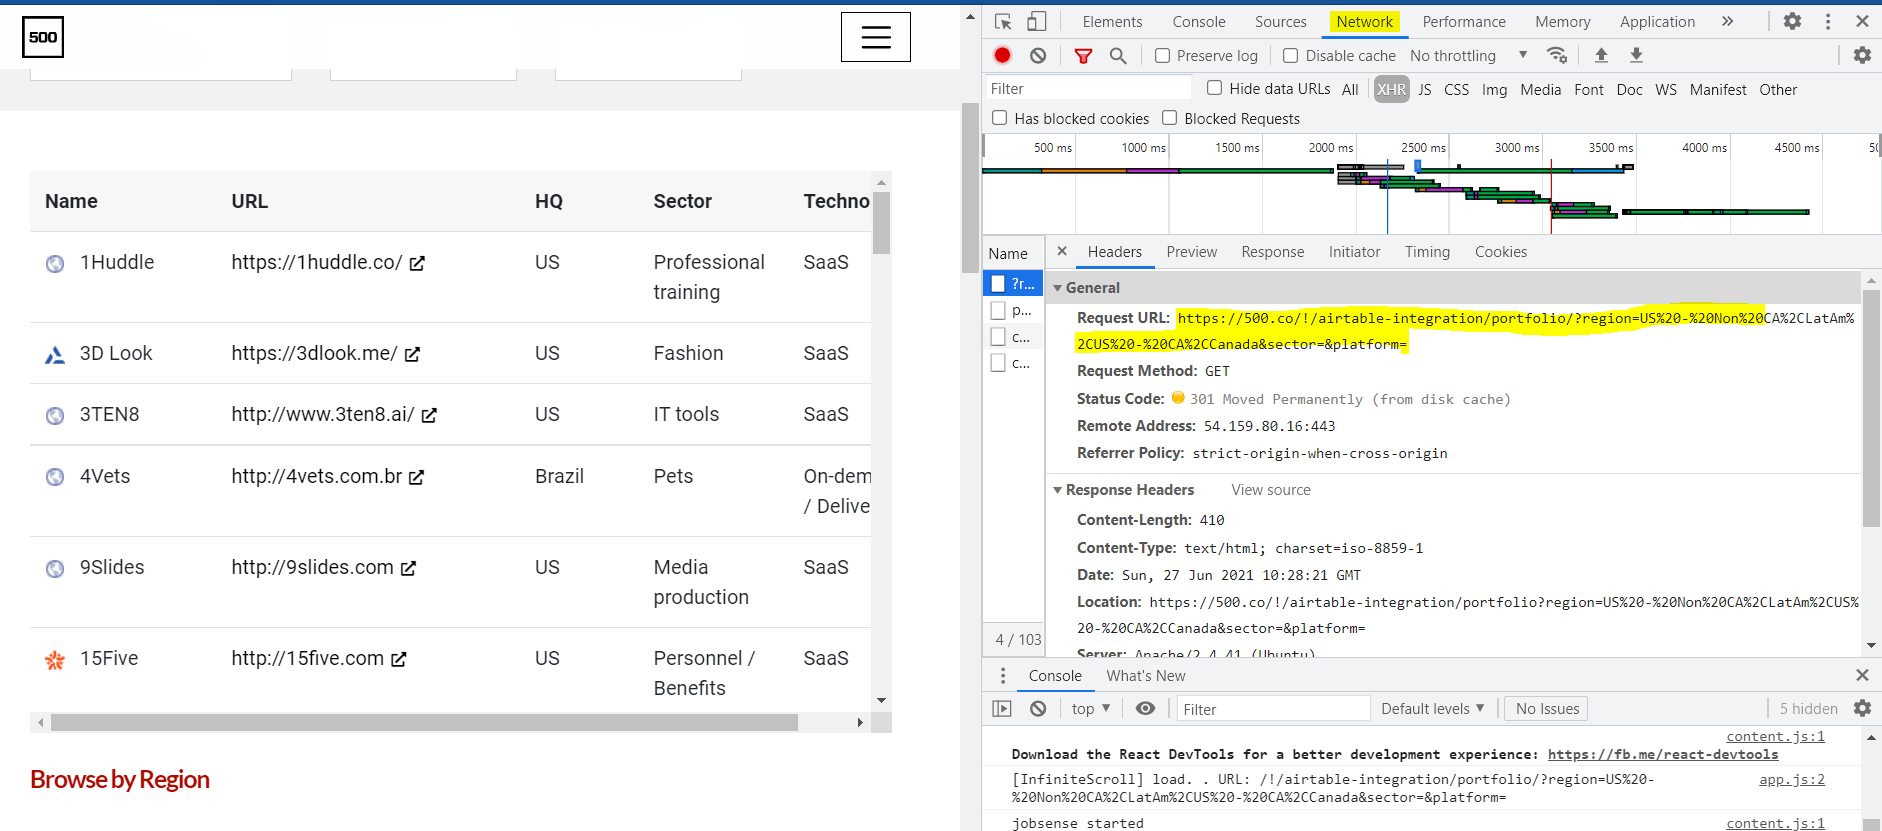

In [150]:
# Inspecting JSON response
# temp = "https://500.co/!/airtable-integration/portfolio?region=US+-+Non+CA%2CLatAm%2CUS+-+CA%2CCanada&sector=&platform=&offset="
# jsonData = requests.get(temp,headers = headers).json()
# print(jsonData)
# print(jsonData.keys())

In [142]:
# Above picture shows which url is use for fetch the table data.
next = "https://500.co/!/airtable-integration/portfolio?region=US+-+Non+CA%2CLatAm%2CUS+-+CA%2CCanada&sector=&platform=&offset="
dataframe = pd.DataFrame() # Initializing an empty dataframe
count = 0 # Initializing a counter
while next: # loop until next field has some data i.e. url
  newjsonData = requests.get(next,headers = headers).json()
  for pos,data in enumerate(newjsonData['data']):
    id = data['id']
    fields = data['fields']
    createdTime = data['createdTime']
    dataframe = dataframe.append(pd.DataFrame(fields,index = [0])).fillna("")
    dataframe['OffsetId'] = id
    dataframe['CreationTime'] = createdTime
  dataframe = dataframe.reset_index()
  dataframe = dataframe.drop(columns=['index'])
  next = newjsonData['next']
  count+=int(newjsonData['count'])

In [143]:
dataframe.shape 

(1554, 19)

In [145]:
# verifying all data is fetched or not.
dataframe.shape[0] == count

True

In [151]:
dataframe.head(50)

,LB ID,Primary name,Batch,URL,Region,Country,Parent sector,Initial invest date,PrimarySector_API,Platform zaps,Fund(s),date modified,creation date,OffsetId,CreationTime,Brazil Site,Publicity/Confidentiality concerns,Deal confidentiality,Durians Site
0,A11869,1Huddle,15,https://1huddle.co/,US - Non CA,US,HR / Education,2015-11-06,Professional training,SaaS,Fund III,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
1,A11789,3D Look,,https://3dlook.me/,US - Non CA,US,Retail / eCommerce,2018-06-19,Fashion,SaaS,Istanbul,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
2,A11353,3TEN8,,http://www.3ten8.ai/,US - CA,US,IT / Security,2017-07-21,IT tools,SaaS,Falcons,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
3,A10019,4Vets,,http://4vets.com.br,LatAm,Brazil,Retail / eCommerce,2013-08-16,Pets,On-demand / Delivery,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,True,,,
4,A10035,9Slides,,http://9slides.com,US - Non CA,US,Media / Collaboration,2012-08-02,Media production,SaaS,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
5,A10005,15Five,,http://15five.com,US - Non CA,US,HR / Education,2012-12-20,Personnel / Benefits,SaaS,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
6,A10017,42,,http://42technologies.com,"Canada, US - CA","Canada, US",Marketing / Customer Success,2014-08-13,Market intel,SaaS,Fund III,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
7,A10016,42 Floors,,http://42floors.com,US - Non CA,US,Real Estate / Transportation,2012-04-15,Realty / Rentals,Marketplace,Fund II,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
8,A10018,43Layers,14,http://43layers.com,US - CA,US,Retail / eCommerce,2015-08-13,Consumer eCom,On-demand / Delivery,Fund III,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,
9,A10614,64 Pixels,,http://64px.com,US - CA,US,Media / Collaboration,2010-10-06,Social media,SaaS,Fund I,2020-11-17T03:39:18.000Z,2020-05-01T19:15:55.000Z,recclopZLBiGKa56q,2020-05-01T19:15:55.000Z,,,,


In [152]:
dataframe.to_csv('StartUps-RawData.csv',index=False)